J :  64297776251.62011
J :  63031018305.52134
J :  61790694237.53247
J :  60576236901.99103
J :  59387091739.98859
J :  58222716488.38939
J :  57082580895.89541
J :  55966166445.978836
J :  54872966086.50778
J :  53802483965.89506
J :  52754235175.60544
J :  51727745498.859924
J :  50722551165.38097
J :  49738198612.02589
J :  48774244249.16026
J :  47830254232.6268
J :  46905804241.16896
J :  46000479259.1725
J :  45113873364.59137
J :  44245589521.92844
J :  43395239380.14428
J :  42562443075.371216
J :  41746829038.31239
J :  40948033806.20947
J :  40165701839.264984
J :  39399485341.4087
J :  38649044085.30023
J :  37914045241.46274
J :  37194163211.44539
J :  36489079464.91513
J :  35798482380.58049
J :  35122067090.852936
J :  34459535330.15379
J :  33810595286.776833
J :  33174961458.21925
J :  32552354509.89587
J :  31942501137.15358
J :  31345133930.50523
J :  30759991244.00422
J :  30186817066.683083
J :  29625360896.981293
J :  29075377620.089478
J :  28536627388.139023
J : 

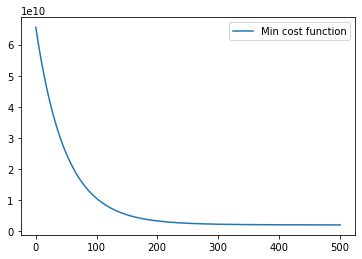

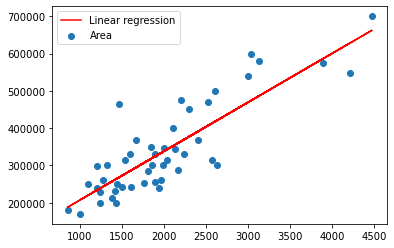

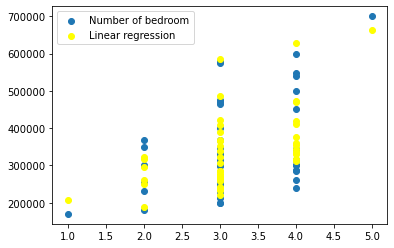

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#Function to compute loss function using vectorization
def compute_cost(X, y, theta):
    #Number of training samples
    m = X.shape[0]
    return 1/(2*m) *np.transpose(X@theta - y) @ ( X@theta-y)

#Implement batch gradient descent 
def batch_gradient_descent(X, y, learning_rate, epochs):
    #Number of learning samples and features
    m, n = X.shape
    #Initial coefficient
    theta = np.zeros(n)
    #Compute loss function
    J = compute_cost(X, y, theta)
    #Variable 
    min_J = [J]
    iter = 0
    converged = False
    while not converged:
        #Compute derivation of cost function to all theta
        dev = 1/m * X.T @ (X@theta - y)
        #Simultaneously update coefficient
        theta = theta - learning_rate * dev
        J = compute_cost(X, y, theta)
        print('J : ',J)
        if J<=0.01 or iter == epochs:
            print('End of learning process !')
            converged = True
        iter += 1
        min_J.append(J)
    plt.plot(min_J, label='Min cost function')
    plt.legend()
    plt.show()
    return theta

if __name__=='__main__':
    #Load data
    data = pd.read_csv('C:/CNTT/DATA/ex1data2.txt', names=['area', 'bedroom','price'])
    #Split features and value
    X = np.array(data.loc[:, 'area' : 'bedroom']).reshape(-1, 2)
    y = np.array(data.loc[:, 'price'])
    #feature scaling using standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    #Add column of X0 features
    X0 = np.ones(X.shape[0]).reshape(-1, 1)
    X_scaled = np.column_stack((X0, X_scaled))
    #compute coefficient
    theta = batch_gradient_descent(X_scaled, y, 0.01, 500)
    #plot data
    plt.scatter(X[:,0], y, label='Area')
    plt.scatter(X[:,1], y, label='Number of bedroom', color='black')
    predict_y = X_scaled @ theta
    plt.plot(X[:, 0],predict_y, label='Linear regression', color='red')
    plt.legend()
    plt.show()
    
    plt.scatter(X[:, 1], predict_y, label='Linear regression', color='yellow')
    plt.legend()
    plt.show()
    